# Binary mask refinement / morphological operations
Post-processing is a simple and efficient technique for post-processing segmentation results, e.g. to fill holes or smooth outlines.

See also
* [Closing](https://en.wikipedia.org/wiki/Closing_(morphology))

We start with the segmented `embryos_grey.tif` example image. This image is a single-channel crop of an image known from the ImageJ example images.

In [1]:
from skimage.io import imread
from skimage import filters
from skimage.morphology import disk, binary_erosion, binary_dilation, binary_opening, binary_closing
import numpy as np
from scipy.ndimage import binary_fill_holes
import stackview

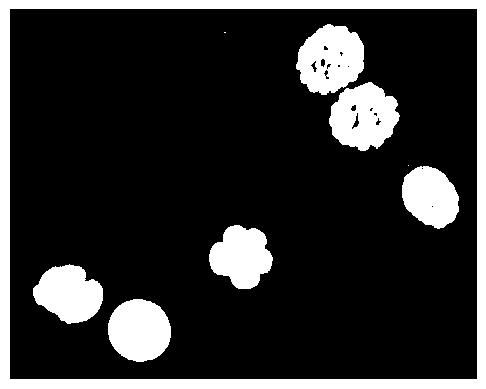

In [2]:
# load image
image = imread('data/embryos_grey.tif')

# binarize the image
binary_image = image < 128

stackview.imshow(binary_image)

## Binary erosion
[Binary erosion](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.binary_erosion) turns white pixels black which have a black neighboring pixel. The neighborhood is defined by a [structuring element](https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html). Thus, coastlines of the islands are eroded.

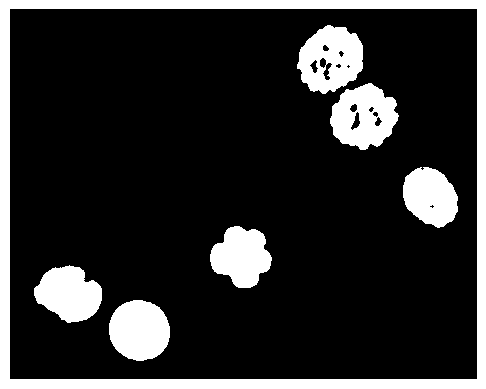

In [3]:
eroded1 = binary_erosion(binary_image, disk(1))
stackview.imshow(eroded1)

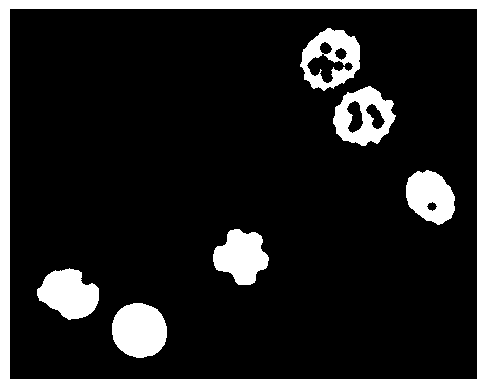

In [4]:
eroded4 = binary_erosion(binary_image, disk(4))
stackview.imshow(eroded4)

## Binary dilation
Analogously, dilation turns black pixels white which have a white neighbor.

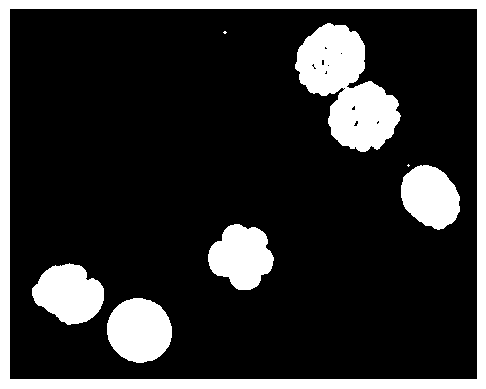

In [5]:
dilated1 = binary_dilation(binary_image, disk(1))
stackview.imshow(dilated1)

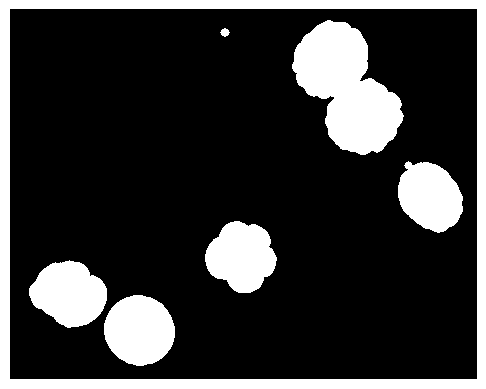

In [6]:
dilated4 = binary_dilation(binary_image, disk(4))
stackview.imshow(dilated4)

## Fill holes
Another important operation is [fill holes](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.binary_fill_holes.html) which is part of the scipy package.

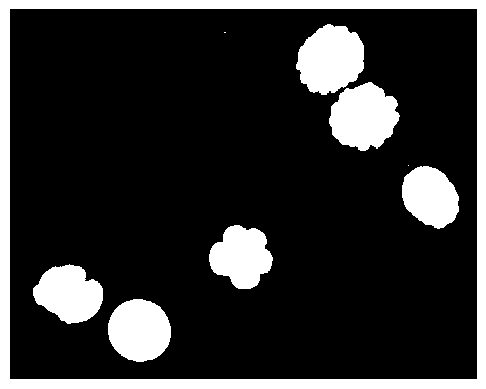

In [7]:
filled = binary_fill_holes(binary_image)
stackview.imshow(filled)

## Binary closing and opening
By combining operations such as erosion and dilation subsequently, one can close and open binary images.

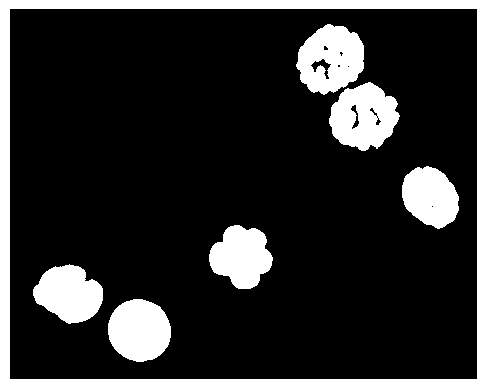

In [8]:
opened = binary_opening(binary_image, disk(4))
stackview.imshow(opened)

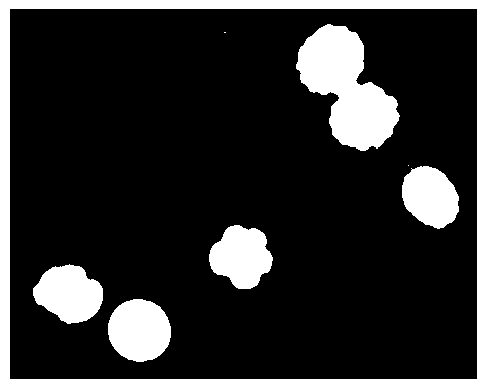

In [9]:
closed = binary_closing(binary_image, disk(4))
stackview.imshow(closed)

## Exercise
Use basic math operations to visualize the difference between the images you just computed. 
What is the difference between the result of binary closing and filling holes? 

Hint: If there is an error saying you cannot apply operators such as "-" to binary images, multiply them with 1. They are no binary images then anymore.